# Module 1: Data Science Fundamentals
## Sprint 3: Intro to Modeling
## Subproject 2: Correlation Analysis, Linear Regression

Welcome to the 2nd subproject of Sprint 3. In this subproject, for the first time we will actually use data to make predictions!

## Learning outcomes

- Quantify correlation between dataset features.
- Predict features from other features with Linear Regression.

## Correlation Analysis

Correlation analysis, at its core, allows to quantify how related features of your dataset are - if one features changes e.g. is incremented, how other one changes.

Let's start by going through [this](https://realpython.com/numpy-scipy-pandas-correlation-python) tutorial. By the end of it, you should be able differentiate between Pearson's and Spearman's correlation coefficients, and how to calculate correlation between variables in Pandas.

In [1]:
# numpy correlation coefficient calculation - Pearson's
import numpy as np
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])

r = np.corrcoef(x, y)
r

array([[1.        , 0.75864029],
       [0.75864029, 1.        ]])

In [4]:
# Scipy correlation coefficient calculation
import numpy as np
import scipy.stats
print(f"pearson's:",scipy.stats.pearsonr(x, y))    # Pearson's r
print(f"spearman's:",scipy.stats.spearmanr(x, y))   # Spearman's rho
print(f"kendall's:",scipy.stats.kendalltau(x, y))  # Kendall's tau

#  p-value in statistical methods when you’re testing a hypothesis

pearson's: (0.758640289091187, 0.010964341301680813)
spearman's: SpearmanrResult(correlation=0.9757575757575757, pvalue=1.4675461874042197e-06)
kendall's: KendalltauResult(correlation=0.911111111111111, pvalue=2.9761904761904762e-05)


In [5]:
# Pandas correlation coefficient
import pandas as pd
x = pd.Series(range(10, 20))
y = pd.Series([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
print(x.corr(y))                    # Pearson's r
print(y.corr(x))

print(x.corr(y, method='spearman'))  # Spearman's rho

print(x.corr(y, method='kendall'))   # Kendall's tau



0.7586402890911867
0.7586402890911869
0.9757575757575757
0.911111111111111


## Linear Regression

Linear regression is the most fundamental statistical relationship modeling algorithm. The algorithm builds a line model (often called a trendline), which allows to not only explain linear regression between some variable in the dataset X and other variable Y, but also predict unseen Y values given X!

Start by watching the intro to linear regression down below:

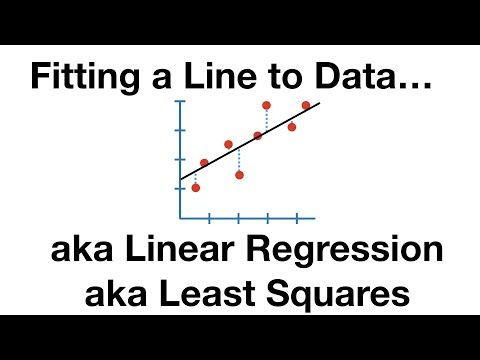

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('PaFPbb66DxQ')

After watching the video above, enroll at [Intro to Machine Learning](https://www.udacity.com/course/intro-to-machine-learning--ud120) (on Udacity) free course. Next, watch a module on linear regression and complete all the quizes, starting from [Lesson 10](https://classroom.udacity.com/courses/ud120/lessons/2301748537/concepts/24828185350923) to the very end of the module. Although you might hear unfamiliar terms e.g. supervised learning, don't think about them just now.

By the end of this section, you should know what linear regression is used for, and how to perform it using Scikit-learn.

### Key takeaways:

* We use linear regression as a tool to model a trendline (like in Excel).
* Regression line explains the numerical relationship between X variable (independent) and Y (dependent).
* Relationship is a weighted sum of X effect on Y. Weight describes how much Y changes when we change X by 1.
* X can be multiple variables, each with its weight.

## Exercise

### Predicting Bicycle Traffic

<div><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Left_side_of_Flying_Pigeon.jpg/2560px-Left_side_of_Flying_Pigeon.jpg" style="height: 350px;"/></div>

We'll follow an example from [Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html#Example:-Predicting-Bicycle-Traffic).

Complete the task yourself and verify afterwards. Don't look at the Jake's solution until you have your own (unless you get stuck), there's no fun in that :).

Objective:

* Predict bike traffic for each day;
* Explain which features affect the number of cyclists most;

Tips:
* Use weather dataset for feature engineering.
* Engineer additional features such as: weeekday, daylight_hrs, is_holiday, temp_celcius, is_dry_day, explain why.

To make things slightly easier, we've downloaded daily bicycle traffic, the daily weather data in Seattle and holiday data, and joined everything.

In case the weather dataset column names seem confusing, check-out [this resource](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00024233/detail), which contains detailed descriptions of each column of the weather dataset.

In [ ]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar

counts = pd.read_csv('https://data.seattle.gov/api/views/65db-xm6k/rows.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/BicycleWeather.csv',  index_col='DATE', parse_dates=True)

daily = counts.resample("d").sum()

cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

Tip - peek into the data. Engineer enough features for `weather` dataframe you might deem useful to predict bicycle traffic. Afterwards, join the datasets and perform regression.

-----

## Summary

In this subproject, we have studied the most popular data modeling approach - linear regression. Linear models hardly overfit, and they are interpretable, thus often preferred as baselines when modeling the data.